In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Komórka przechowująca używane w tym pliku funkcje.

# Funkcja do wyświetlania pierwszych dziesięciu i ostatnich dziesięciu wierszy zbioru danych oraz do wyświetlania typów danych wszystkich zmiennych tego zbioru.
def dfhead_dftail_dftypes(df, ile):
    dfhead_dftail_dftypes = pd.concat([df.head(ile), df.tail(ile)])
    
    column_types = pd.DataFrame(df.dtypes, columns=['Type']).T
    column_types.columns = df.columns
    column_types.index = ['Column types']
    
    df_with_column_types = pd.concat([column_types, dfhead_dftail_dftypes])
    
    return df_with_column_types

# Funkcja do wyświetlania podstawowych informacji o zbiorze danych oraz do wypisywania liczby wierszy, kolumn i zdupikowanych wierszy tego zbioru.
def dfinfo_extra(df):
    df.info()
    print("\n" + f"Liczba wierszy: {df.shape[0]}")
    print(f"Liczba kolumn: {df.shape[1]}")
    print(f"Liczba zduplikowanych wierszy: {df.duplicated().sum()}")

# Funkcja do pozyskiwania nazw wszystkich zmiennych, numerycznych zmiennych i kategorycznych zmiennych zbioru danych.
def get_columns_name(df):
    all_columns_name = df.columns.tolist()
    numeric_columns_name = df.select_dtypes(include=['number']).columns.tolist()
    category_columns_name = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return all_columns_name, numeric_columns_name, category_columns_name

# Funkcja do wyświetlania zestawienia podstawowych statystyk opisowych zmiennych numerycznych zbioru danych. Do tych statystyk funkcja dodaje medianę, dominantę i współczynnik zmienności.
def describe_numeric_extra(df):
    _, numeric_columns, _ = get_columns_name(df)
    numeric_df = df[numeric_columns]

    describe = numeric_df.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.40,0.50, 0.60, 0.75, 0.90, 0.95, 0.99]).T

    describe['median'] = numeric_df.median()
    describe['mode']= numeric_df.mode().iloc[0]
    describe['wsp_zmien'] = describe['std'] / describe['mean']

    core   = ['count', 'mean', 'median', 'mode', 'std', 'wsp_zmien']
    others = [c for c in describe.columns if c not in core]

    return describe[core + others]

# Funkcja do wyświetlania zestawienia podstawowych statystyk opisowych zmiennych kategorycznych zbioru danych.
def describe_categoric_extra(df):
    _, _, category_columns_name = get_columns_name(df)
    category_df = df[category_columns_name]
    describe = category_df.describe().T
    
    return describe

# Funkcja do wyświetlania zestawienia zawierającego typy zmiennych zbioru danych oraz ilość brakujących, unikatowych i wszystkich niepustych wartości tych zmiennych.
def missing_unique_summary(df):
    df_missing_unique_summary = pd.DataFrame(df.dtypes, columns=['dtype'])
    df_missing_unique_summary['missing [#]'] = df.isna().sum()
    df_missing_unique_summary['missing [%]'] = df.isna().sum()/len(df)*100
    df_missing_unique_summary['unique'] = df.nunique().values
    df_missing_unique_summary['non unique'] = df.count().values - df.nunique().values
    df_missing_unique_summary['count'] = df.count().values
    
    return df_missing_unique_summary.style.background_gradient(cmap='Purples')

In [3]:
df = pd.read_csv('kredyty_auto_Scoring2025s - Training.csv') # Wczytanie danych
dfhead_dftail_dftypes(df, 10) # Wyświetlenie pierwszych dziesięciu i ostatnich dziesięciu wierszy wczytanego zbioru danych oraz typów danych wszystkich zmiennych tego zbioru.

,LP,data_akceptacji,grupa_ryzyka,kod_partnera,typ_umowy,scoring_FICO,okres_kredytu,kwota_kredytu,oproc_refin,oproc_konkur,koszt_pieniadza,oproc_propon,akceptacja_klienta
Column types,int64,object,int64,int64,object,int64,int64,object,object,object,object,object,int64
0,1,17/4/2005,2,2,R,702,48,"$26,500",3.99%,4.99%,1.10%,6.59%,0
1,2,17/4/2005,2,2,N,719,72,"$35,000",0.00%,4.79%,1.10%,5.99%,0
2,3,17/4/2005,1,3,N,802,60,"$28,000",0.00%,3.99%,1.10%,3.55%,0
3,4,17/4/2005,1,1,R,723,60,"$20,751",6.75%,4.99%,1.10%,4.89%,1
4,5,17/4/2005,3,1,U,690,72,"$20,000",0.00%,5.29%,1.10%,6.79%,0
5,6,21/4/2005,1,3,N,681,60,"$38,000",0.00%,3.99%,1.10%,3.85%,0
6,7,17/4/2005,1,1,U,805,36,"$5,724",0.00%,4.05%,1.10%,3.89%,1
7,8,17/4/2005,2,2,R,726,60,"$21,596",5.99%,4.99%,1.10%,5.25%,0
8,9,17/4/2005,1,1,N,765,60,"$27,000",0.00%,3.99%,1.10%,3.85%,0


In [4]:
del df["LP"] # Usunięcie kolumny LP, bo nie wnosi informacji do zbioru.

# Usunięcie symboli $ i % z wybranych zmiennych oraz konwersja na float
PERCENT_COLS = ["oproc_refin", "oproc_konkur", "koszt_pieniadza", "oproc_propon",]
MONEY_COLS = ["kwota_kredytu"]

for col in PERCENT_COLS + MONEY_COLS:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[\s\$,%,]", "", regex=True)
        .replace({"": np.nan, "nan": np.nan})
        .astype(float)
    )

# Konwersja procentów na ułamki dziesiętne (5% ⇒ 0.05)
df[PERCENT_COLS] = df[PERCENT_COLS] / 100

# Zmapowanie zmiennej "typ_umowy"
umowa_map = {'U': 0,   # na samochód używany
             'N': 1,   # na samochód nowy
             'R': 2}   # refinansowanie

df['typ_umowy'] = df['typ_umowy'].map(umowa_map)

dfhead_dftail_dftypes(df, 10) # Wyświetlenie pierwszych dziesięciu i ostatnich dziesięciu wierszy wczytanego zbioru danych oraz typów danych wszystkich zmiennych tego zbioru.

,data_akceptacji,grupa_ryzyka,kod_partnera,typ_umowy,scoring_FICO,okres_kredytu,kwota_kredytu,oproc_refin,oproc_konkur,koszt_pieniadza,oproc_propon,akceptacja_klienta
Column types,object,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64
0,17/4/2005,2,2,2,702,48,26500.0,0.0399,0.0499,0.011,0.0659,0
1,17/4/2005,2,2,1,719,72,35000.0,0.0,0.0479,0.011,0.0599,0
2,17/4/2005,1,3,1,802,60,28000.0,0.0,0.0399,0.011,0.0355,0
3,17/4/2005,1,1,2,723,60,20751.0,0.0675,0.0499,0.011,0.0489,1
4,17/4/2005,3,1,0,690,72,20000.0,0.0,0.0529,0.011,0.0679,0
5,21/4/2005,1,3,1,681,60,38000.0,0.0,0.0399,0.011,0.0385,0
6,17/4/2005,1,1,0,805,36,5724.0,0.0,0.0405,0.011,0.0389,1
7,17/4/2005,2,2,2,726,60,21596.0,0.0599,0.0499,0.011,0.0525,0
8,17/4/2005,1,1,1,765,60,27000.0,0.0,0.0399,0.011,0.0385,0


In [5]:
dfinfo_extra(df) # Wyświetlenie podstawowych informacji o zbiorze danych.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   data_akceptacji     40000 non-null  object 
 1   grupa_ryzyka        40000 non-null  int64  
 2   kod_partnera        40000 non-null  int64  
 3   typ_umowy           40000 non-null  int64  
 4   scoring_FICO        40000 non-null  int64  
 5   okres_kredytu       40000 non-null  int64  
 6   kwota_kredytu       40000 non-null  float64
 7   oproc_refin         40000 non-null  float64
 8   oproc_konkur        40000 non-null  float64
 9   koszt_pieniadza     40000 non-null  float64
 10  oproc_propon        40000 non-null  float64
 11  akceptacja_klienta  40000 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.7+ MB

Liczba wierszy: 40000
Liczba kolumn: 12
Liczba zduplikowanych wierszy: 57


In [6]:
df = df.drop_duplicates().reset_index(drop=True) # Usunięcie zduplikowanych wierszy
dfhead_dftail_dftypes(df, 10) # Wyświetlenie pierwszych dziesięciu i ostatnich dziesięciu wierszy wczytanego zbioru danych oraz typów danych wszystkich zmiennych tego zbioru.

,data_akceptacji,grupa_ryzyka,kod_partnera,typ_umowy,scoring_FICO,okres_kredytu,kwota_kredytu,oproc_refin,oproc_konkur,koszt_pieniadza,oproc_propon,akceptacja_klienta
Column types,object,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64
0,17/4/2005,2,2,2,702,48,26500.0,0.0399,0.0499,0.011,0.0659,0
1,17/4/2005,2,2,1,719,72,35000.0,0.0,0.0479,0.011,0.0599,0
2,17/4/2005,1,3,1,802,60,28000.0,0.0,0.0399,0.011,0.0355,0
3,17/4/2005,1,1,2,723,60,20751.0,0.0675,0.0499,0.011,0.0489,1
4,17/4/2005,3,1,0,690,72,20000.0,0.0,0.0529,0.011,0.0679,0
5,21/4/2005,1,3,1,681,60,38000.0,0.0,0.0399,0.011,0.0385,0
6,17/4/2005,1,1,0,805,36,5724.0,0.0,0.0405,0.011,0.0389,1
7,17/4/2005,2,2,2,726,60,21596.0,0.0599,0.0499,0.011,0.0525,0
8,17/4/2005,1,1,1,765,60,27000.0,0.0,0.0399,0.011,0.0385,0


In [7]:
dfinfo_extra(df) # Wyświetlenie podstawowych informacji o zbiorze danych.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39943 entries, 0 to 39942
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   data_akceptacji     39943 non-null  object 
 1   grupa_ryzyka        39943 non-null  int64  
 2   kod_partnera        39943 non-null  int64  
 3   typ_umowy           39943 non-null  int64  
 4   scoring_FICO        39943 non-null  int64  
 5   okres_kredytu       39943 non-null  int64  
 6   kwota_kredytu       39943 non-null  float64
 7   oproc_refin         39943 non-null  float64
 8   oproc_konkur        39943 non-null  float64
 9   koszt_pieniadza     39943 non-null  float64
 10  oproc_propon        39943 non-null  float64
 11  akceptacja_klienta  39943 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.7+ MB

Liczba wierszy: 39943
Liczba kolumn: 12
Liczba zduplikowanych wierszy: 0


In [8]:
missing_unique_summary(df) # Wyświetlenie zestawienia zawierającego typy zmiennych zbioru danych oraz ilość brakujących, unikatowych i wszystkich niepustych wartości dla każdej z tych zmiennych.

,dtype,missing [#],missing [%],unique,non unique,count
data_akceptacji,object,0,0.000000,168,39775,39943
grupa_ryzyka,int64,0,0.000000,4,39939,39943
kod_partnera,int64,0,0.000000,3,39940,39943
typ_umowy,int64,0,0.000000,3,39940,39943
scoring_FICO,int64,0,0.000000,246,39697,39943
okres_kredytu,int64,0,0.000000,5,39938,39943
kwota_kredytu,float64,0,0.000000,12141,27802,39943
oproc_refin,float64,0,0.000000,688,39255,39943
oproc_konkur,float64,0,0.000000,37,39906,39943
koszt_pieniadza,float64,0,0.000000,56,39887,39943


In [9]:
describe_numeric_extra(df) # Wyświetlenie zestawienia podstawowych statystyk opisowych zmiennych numerycznych

,count,mean,median,mode,std,wsp_zmien,min,1%,5%,10%,25%,40%,50%,60%,75%,90%,95%,99%,max
grupa_ryzyka,39943.0,2.053902,2.0000,1.0000,1.090481,0.530931,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,3.0000,4.0000,4.0000,4.0000,4.0000
kod_partnera,39943.0,2.102746,2.0000,3.0000,0.912807,0.434102,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000
typ_umowy,39943.0,0.922915,1.0000,0.0000,0.797724,0.864353,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000
scoring_FICO,39943.0,720.712490,717.0000,705.0000,46.580024,0.064631,601.0000,641.0000,650.0000,660.0000,684.0000,704.0000,717.0000,730.0000,755.0000,787.0000,803.0000,825.0000,851.0000
okres_kredytu,39943.0,57.187092,60.0000,60.0000,11.388858,0.199151,36.0000,36.0000,36.0000,36.0000,48.0000,60.0000,60.0000,60.0000,60.0000,72.0000,72.0000,72.0000,72.0000
kwota_kredytu,39943.0,24206.484465,23000.0000,30000.0000,11211.019380,0.463141,4527.0000,5510.5000,8400.0000,10835.2000,15700.0000,20000.0000,23000.0000,25480.2000,30900.0000,39867.8000,45000.0000,55000.0000,100000.0000
oproc_refin,39943.0,0.023656,0.0000,0.0000,0.041137,1.738979,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0550,0.0875,0.1030,0.1600,0.2400
oproc_konkur,39943.0,0.049634,0.0499,0.0539,0.005794,0.116737,0.0299,0.0365,0.0399,0.0439,0.0449,0.0479,0.0499,0.0509,0.0539,0.0569,0.0589,0.0629,0.0629
koszt_pieniadza,39943.0,0.014169,0.0138,0.0110,0.002620,0.184942,0.0109,0.0110,0.0110,0.0110,0.0111,0.0132,0.0138,0.0151,0.0163,0.0183,0.0184,0.0184,0.0210
oproc_propon,39943.0,0.065870,0.0634,0.0449,0.020706,0.314346,0.0259,0.0349,0.0415,0.0439,0.0482,0.0539,0.0634,0.0684,0.0824,0.0999,0.1085,0.1115,0.1135


In [10]:
describe_categoric_extra(df) # Wyświetlenie zestawienia podstawowych statystyk opisowych zmiennych kategorycznych

,count,unique,top,freq
data_akceptacji,39943,168,6/7/2005,487


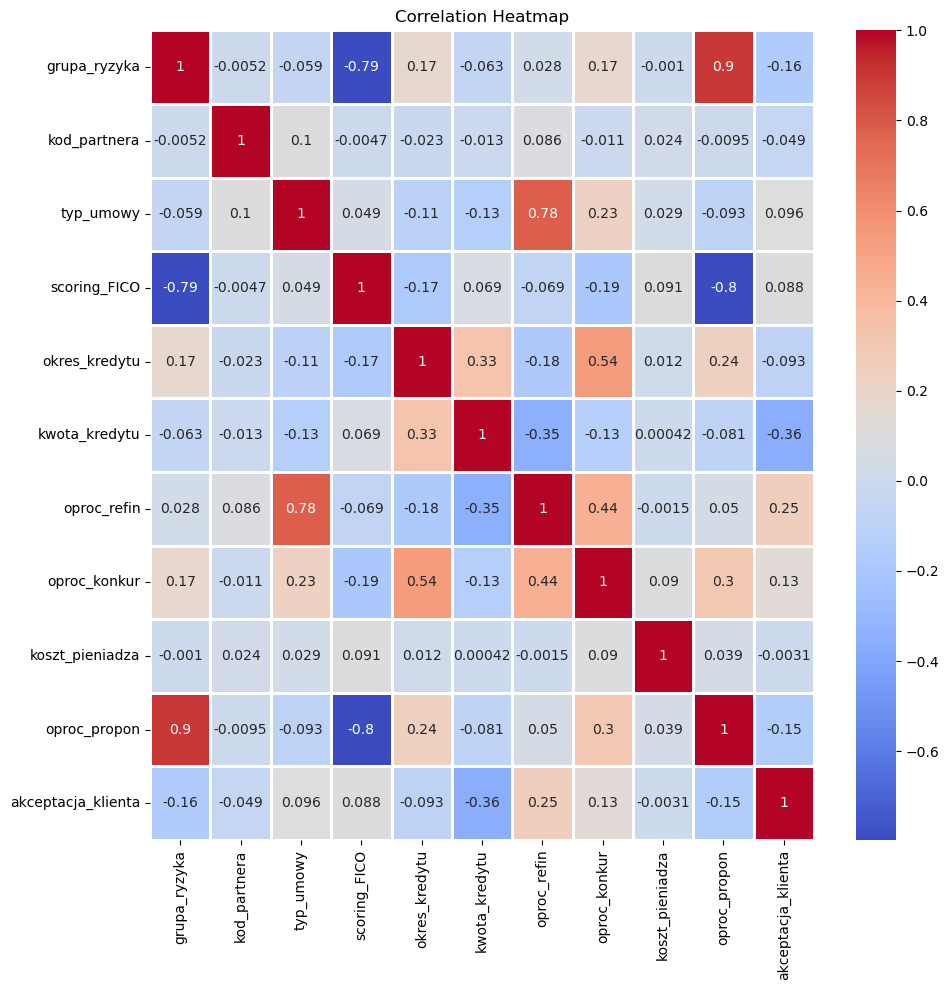

In [11]:
# Wyświetlenie korelacji Pearsona między zmiennymi
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
corr = df_numeric.corr()
# mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=2, annot_kws={'size': 10})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [12]:
# Wyświetlenie w kolejności malejącej tylko par zmiennych, które są ze sobą skorelowane na poziomie powyżej abs(0,5)
num_cols = df.select_dtypes(include=[np.number]).columns
corr_mtx = df[num_cols].corr()

# Tworzenie tylko górnego trójkąta macierzy bez przekątnej
pairs = (corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
            .stack()
            .reset_index()
            .rename(columns={'level_0':'feature_1', 'level_1':'feature_2', 0:'correlation'}))

threshold = 0.5 
high_corr = (pairs.loc[pairs['correlation'].abs() > threshold]
                    .sort_values(by='correlation', key=np.abs, ascending=False)
                    .reset_index(drop=True))

high_corr

,feature_1,feature_2,correlation
0,grupa_ryzyka,oproc_propon,0.900427
1,scoring_FICO,oproc_propon,-0.796919
2,grupa_ryzyka,scoring_FICO,-0.794934
3,typ_umowy,oproc_refin,0.776450
4,okres_kredytu,oproc_konkur,0.538324


In [13]:
# Obliczenie VIF
num_cols = df.select_dtypes(include=[np.number]).columns
X = df[num_cols].copy()

X.loc[:, X.dtypes == "bool"] = X.loc[:, X.dtypes == "bool"].astype(int) # zamienienie typu danych zmiennych bool na int

X["intercept"] = 1.0 # dodanie stałej (intercept)

vif = (pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns,name="VIF")
    .to_frame()
    .drop(index="intercept") # usunięcie wyliczania kolinearność dla interceptu
    .sort_values("VIF", ascending=False))

vif

,VIF
oproc_propon,7.004072
grupa_ryzyka,6.227373
oproc_refin,4.918359
scoring_FICO,3.148156
typ_umowy,3.141354
oproc_konkur,3.089640
okres_kredytu,2.553411
kwota_kredytu,1.502673
akceptacja_klienta,1.272070
koszt_pieniadza,1.067801


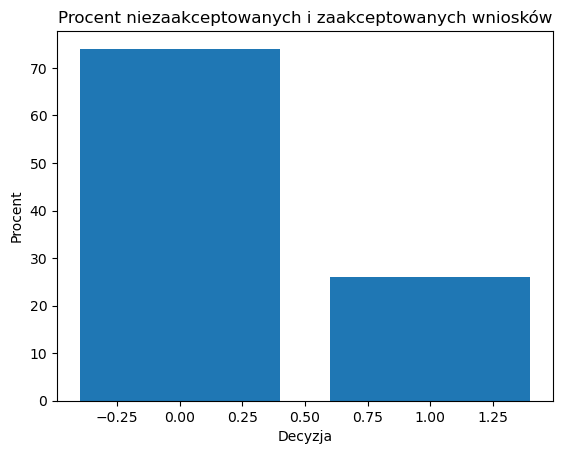

akceptacja_klienta
0    74.045515
1    25.954485
Name: count, dtype: float64

In [14]:
#Stosunek niezaakceptowanych i zaakceptowanych wniosków o kredyt przez bank
counts = df['akceptacja_klienta'].value_counts()
percentages = counts / counts.sum() * 100

plt.bar(percentages.index, percentages.values)
plt.title('Procent niezaakceptowanych i zaakceptowanych wniosków')
plt.xlabel('Decyzja')
plt.ylabel('Procent')
plt.show()

percentages

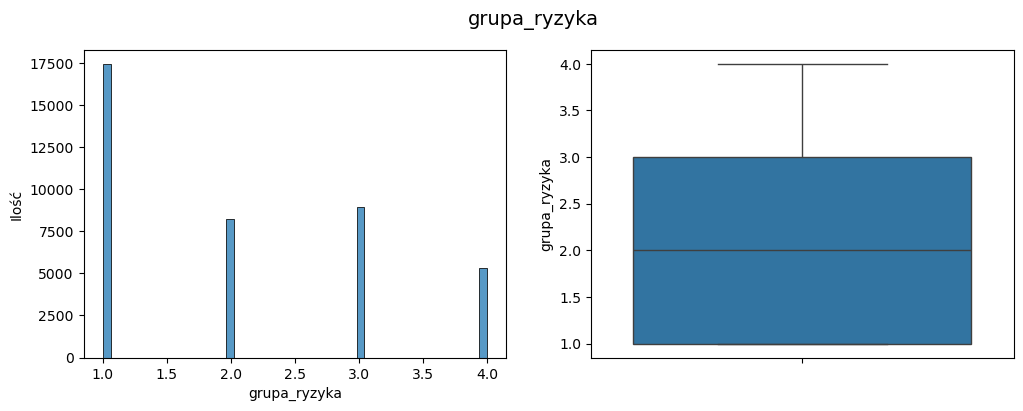

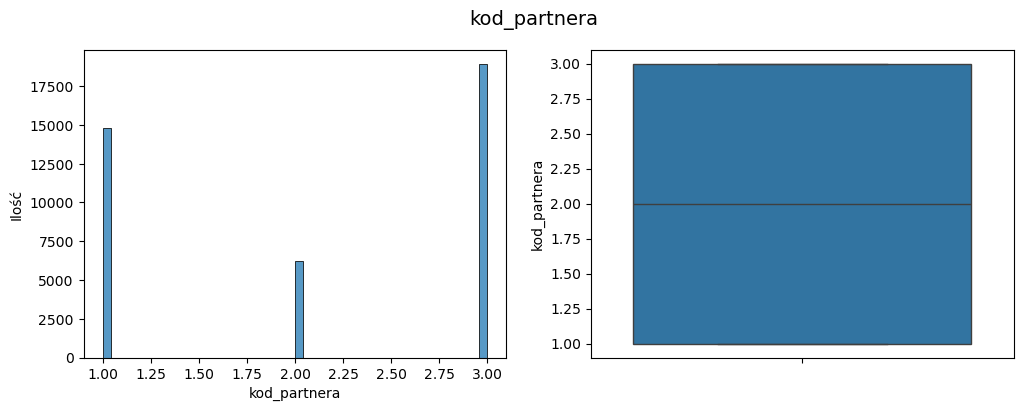

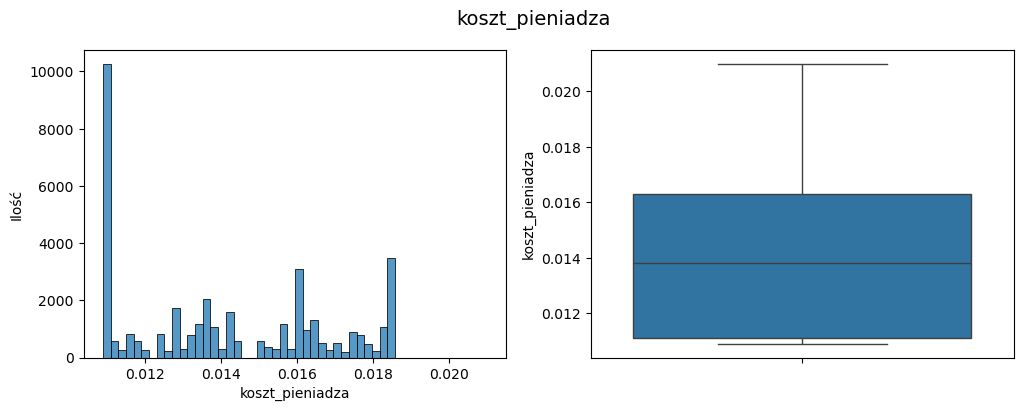

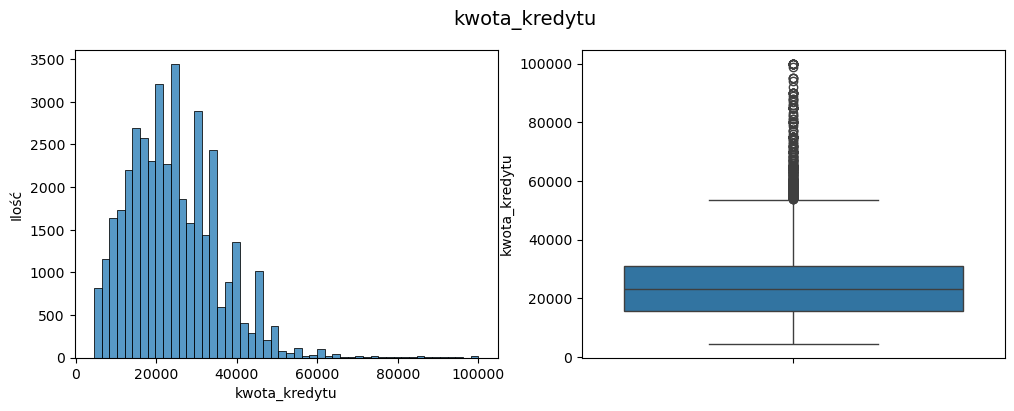

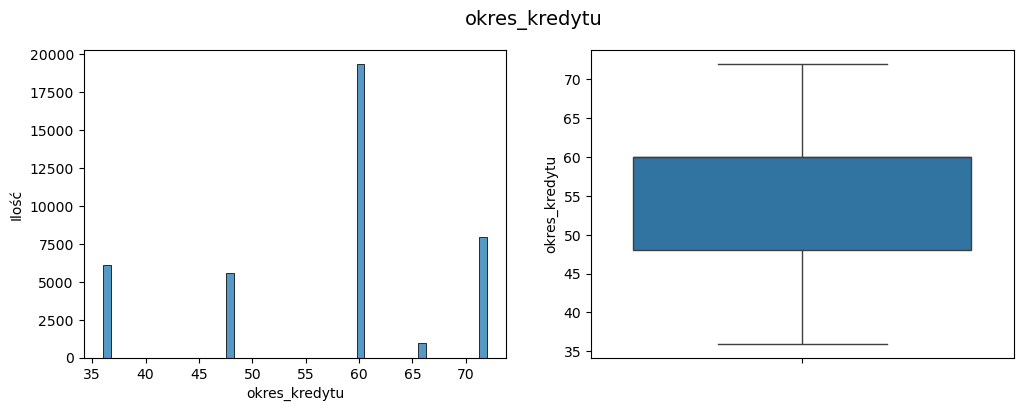

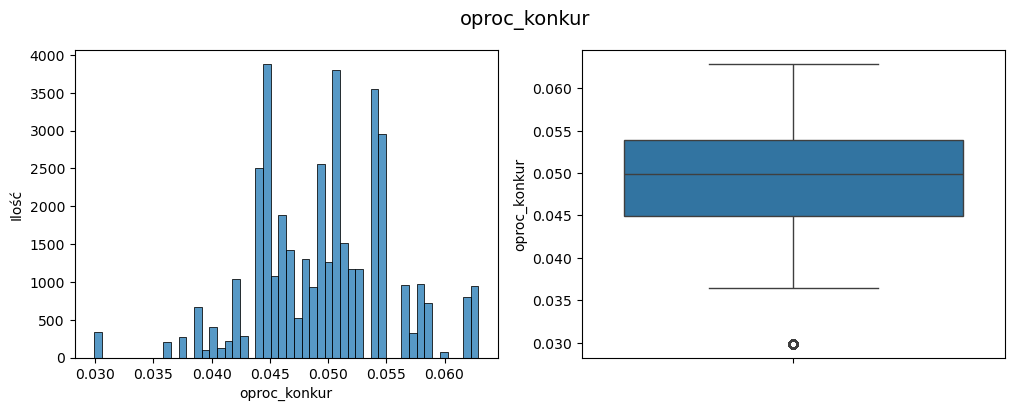

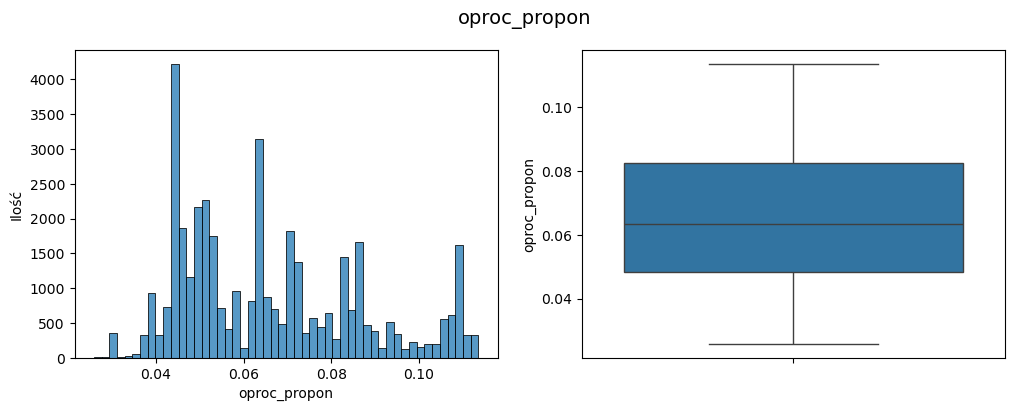

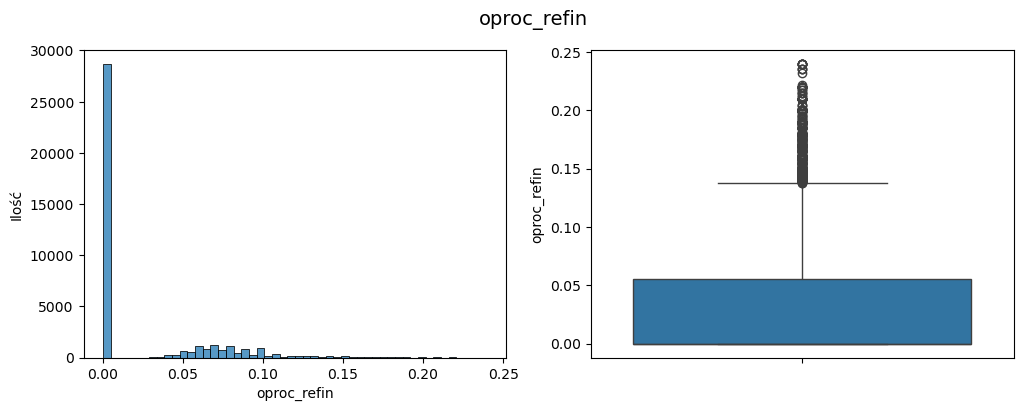

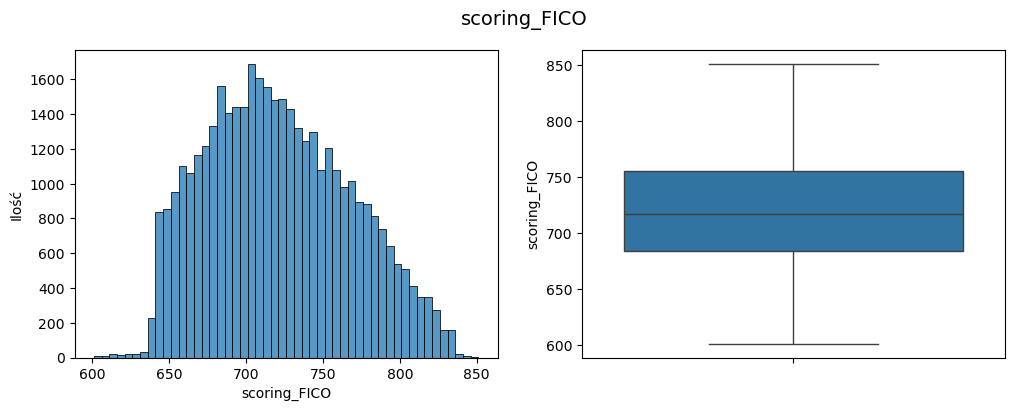

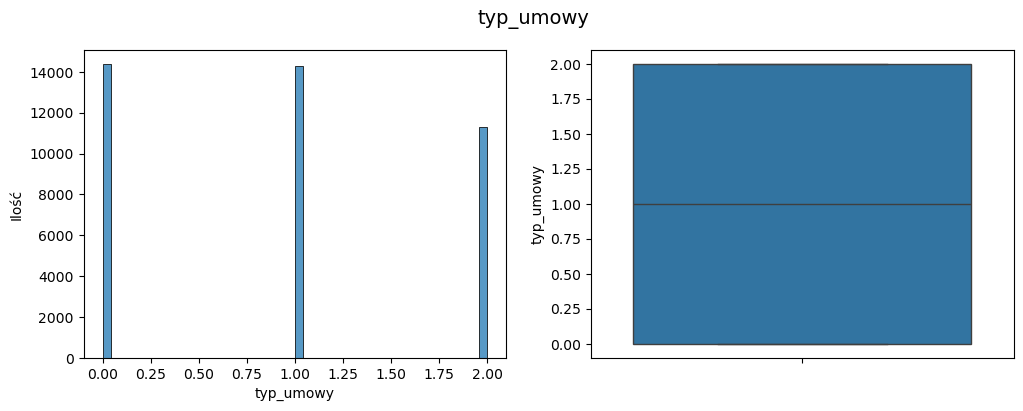

In [15]:
#Wyświetlenie histogramu w podziale na 50 klas oraz wykresu pudełkowego każdej zmiennej numerycznej ze zbioru (oprócz zmiennej celu)
predictors = (
    df.select_dtypes('number')          # tylko typy liczbowe
      .columns
      .difference(['akceptacja_klienta'])  # wykluczenie celu
)

for col in predictors:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
    sns.histplot(data=df, x=col, bins=50, ax=ax1)
    ax1.set_ylabel('Ilość')
    sns.boxplot(data=df, y=col, ax=ax2)
    fig.suptitle(col, fontsize=14)
    plt.show()

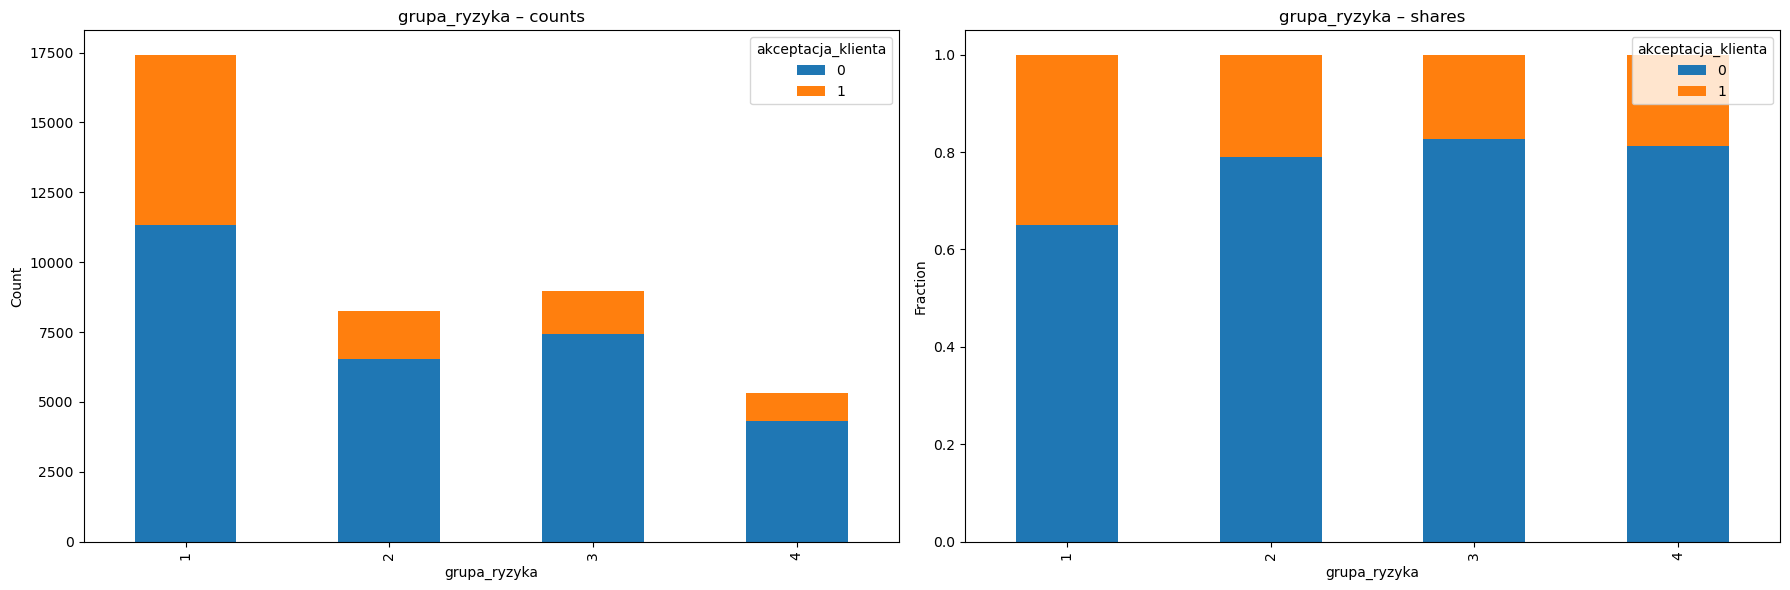

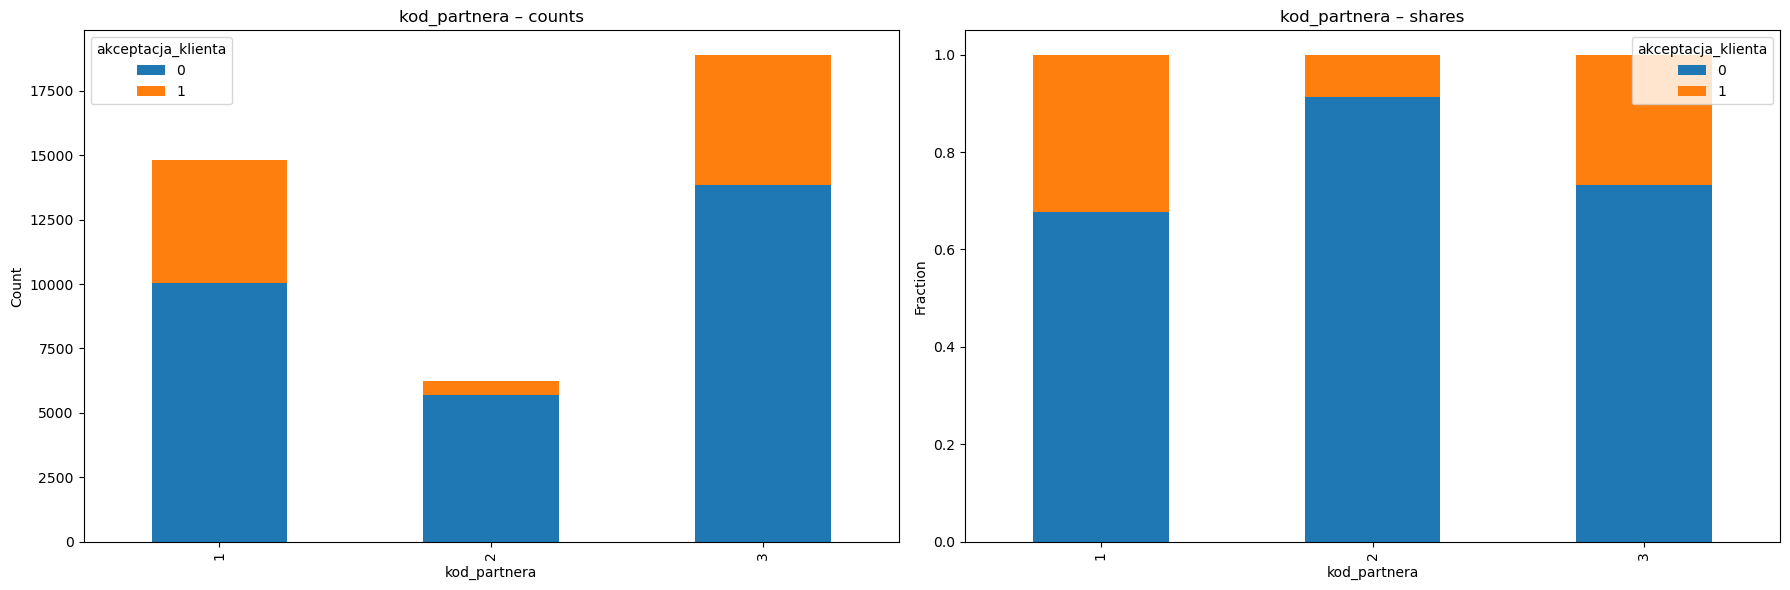

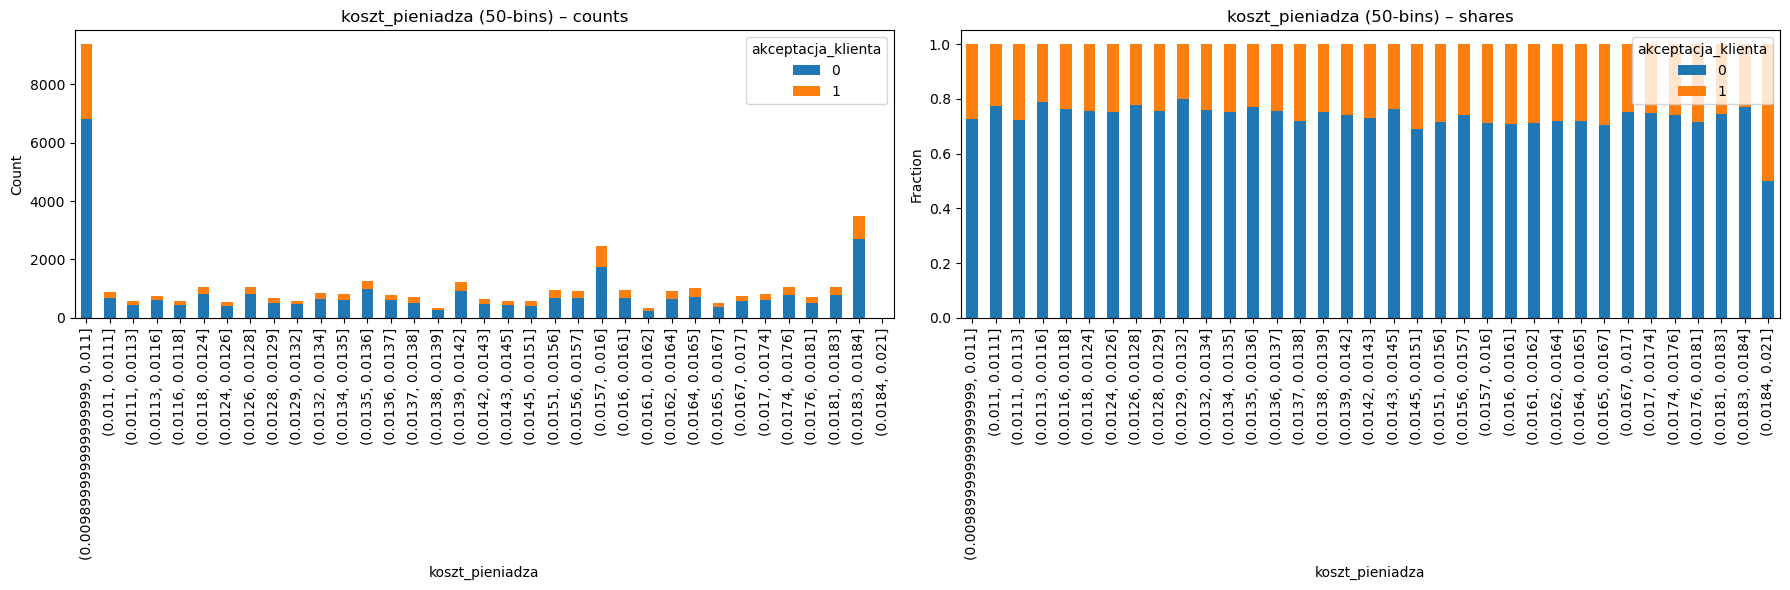

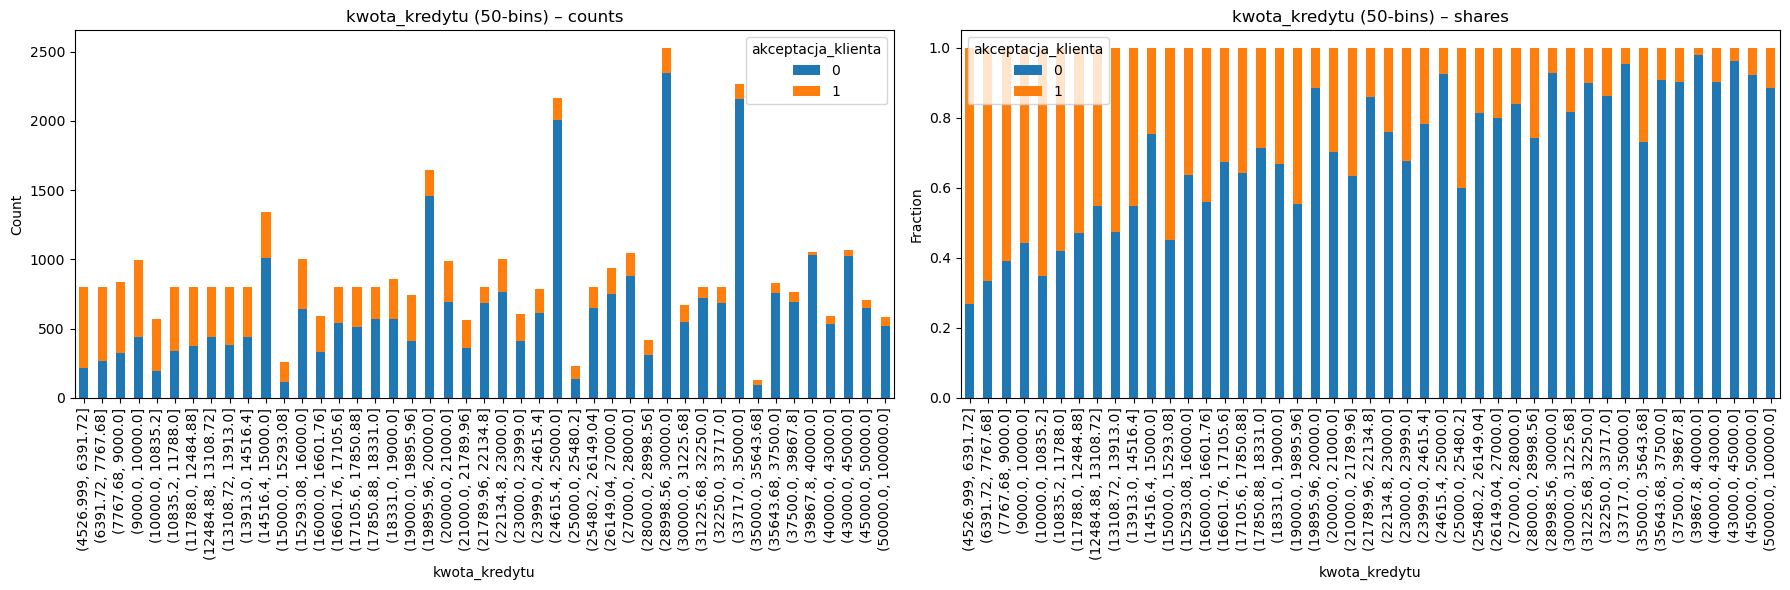

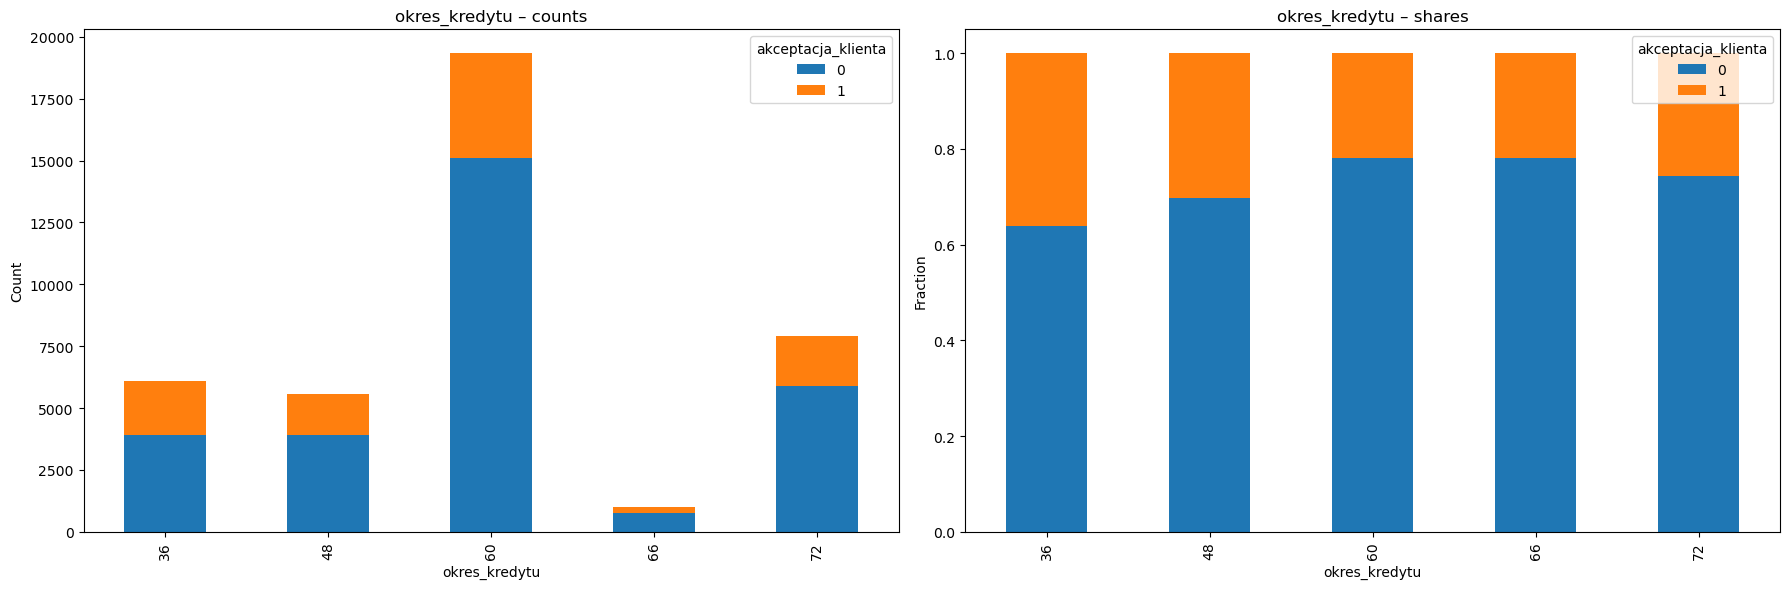

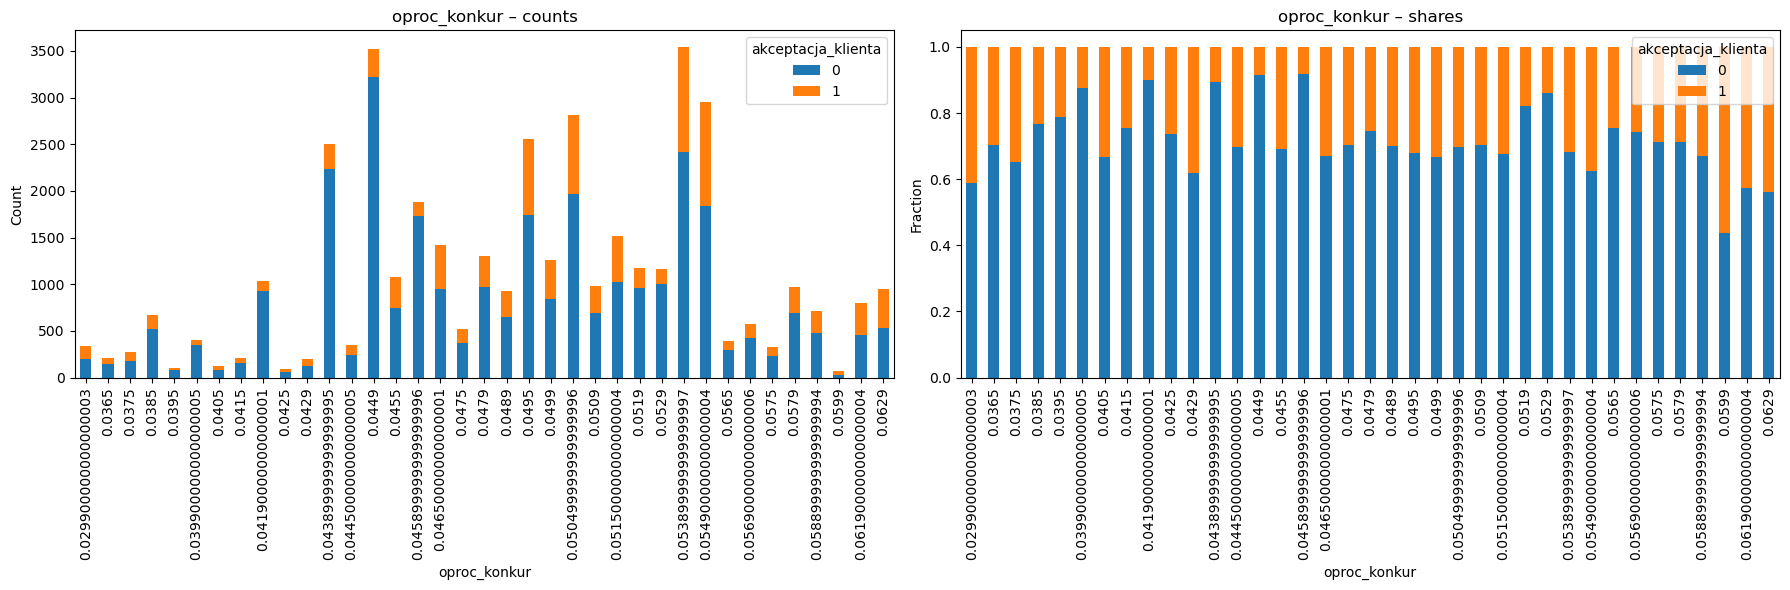

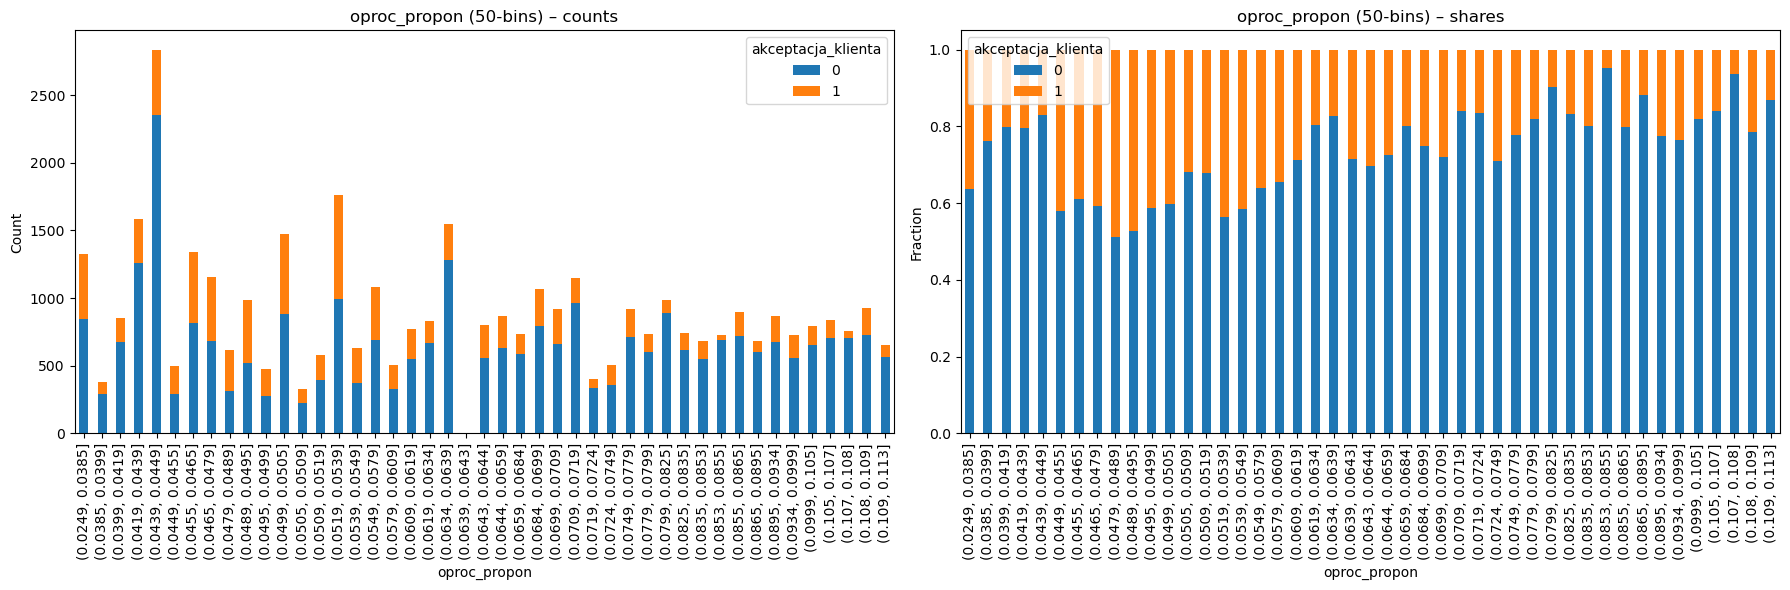

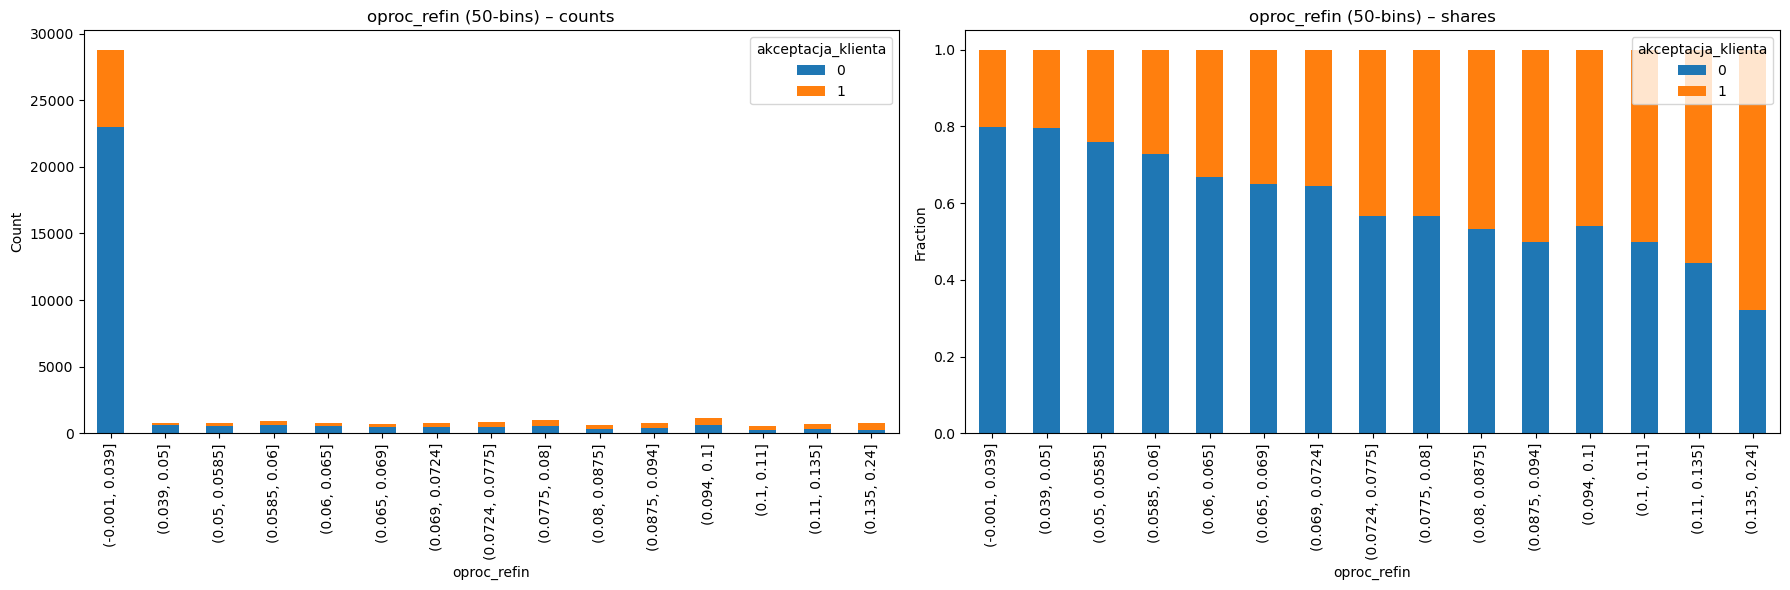

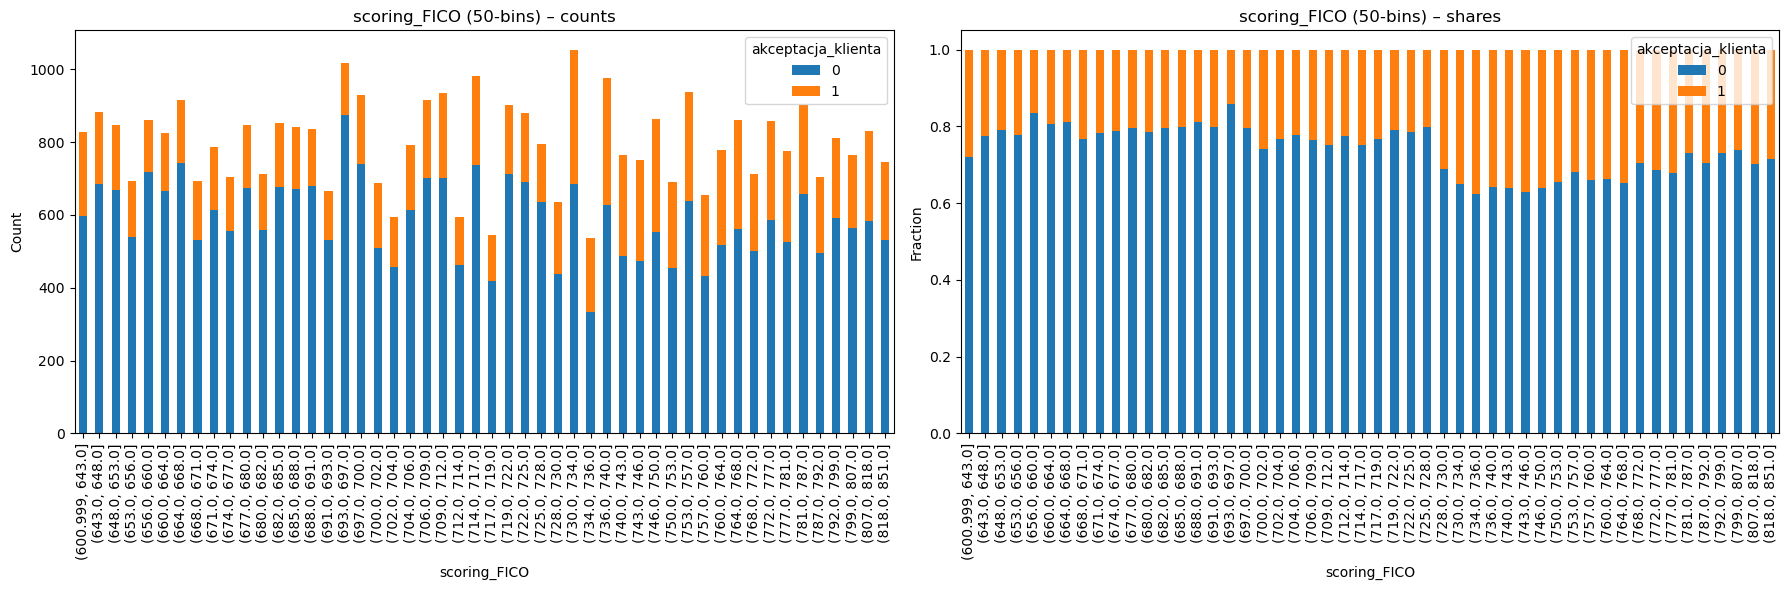

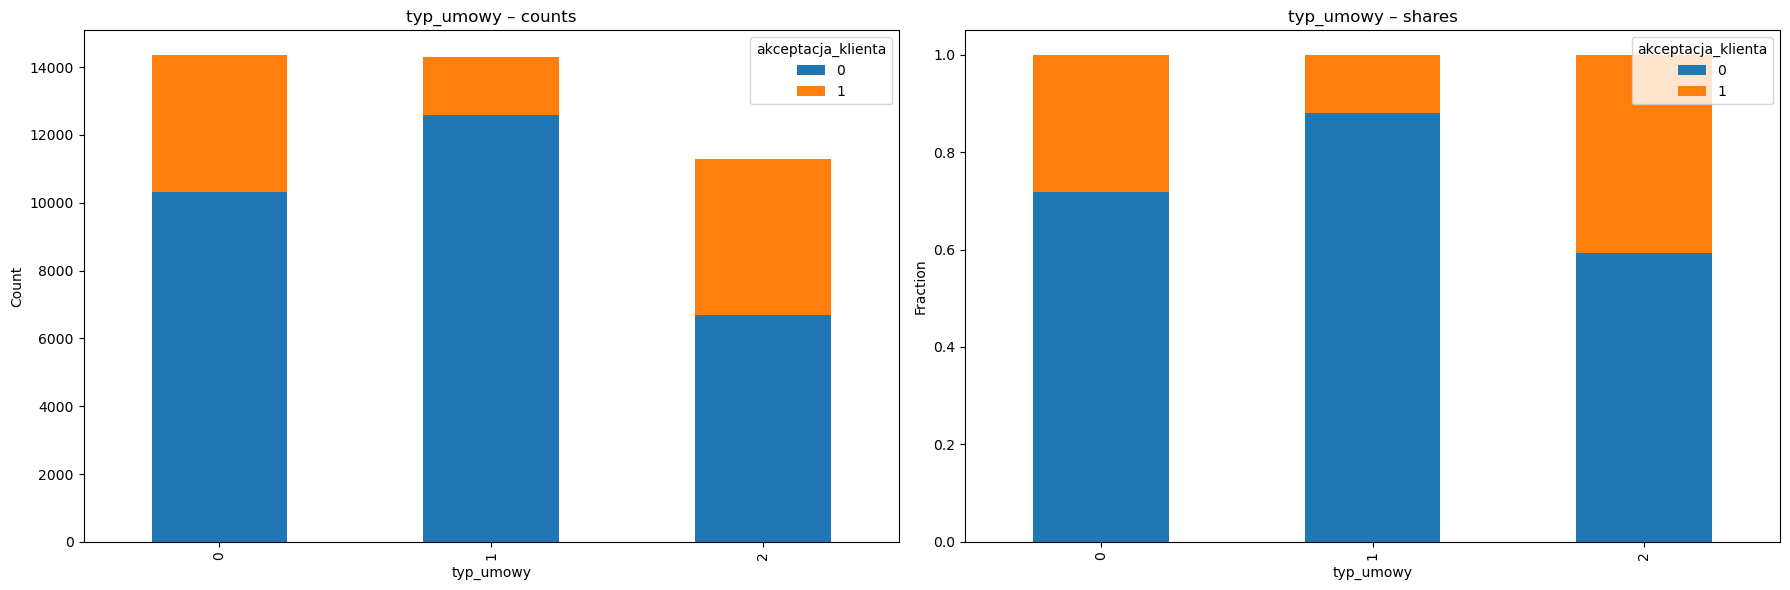

In [16]:
# 1. Kolumny numeryczne – bez zmiennej celu
predictors = (
    df.select_dtypes('number')          # tylko typy liczbowe
      .columns
      .difference(['akceptacja_klienta'])  # wykluczenie celu
)
# predictors = [c for c in predictors if df[c].nunique() < 300]

# 2. Wyswietlenie (nieznormalizowanych i zronmalizowanych) proporcji wniosków niezaakcpetowanych do zaakceptowanych dla różnych wartości jakie przyjmują zmienne numeryczne ze zbioru.
# Jeśli dla jakaś zmienna posiada więcej niż 50 unikalnych wartości to następuje binowanie na 50 równolicznych klas
for col in predictors:
    if df[col].nunique() > 50:
        # 50 bins o tej samej liczności
        bins       = pd.qcut(df[col], q=50, duplicates='drop')
        data_plot  = df.assign(_bin=bins)
        group_key  = '_bin'
        suffix     = ' (50-bins)'
    else:
        data_plot  = df
        group_key  = col
        suffix     = ''

    fig, ax = plt.subplots(ncols=2, figsize=(18, 6))

    # nieznormalizowane liczebności
    (data_plot.groupby(group_key)['akceptacja_klienta']
              .value_counts(normalize=False)
              .unstack()
              .plot(kind='bar', stacked=True, ax=ax[0]))
    ax[0].set_title(f'{col}{suffix} – counts')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')

    # znormalizowane udziały
    (data_plot.groupby(group_key)['akceptacja_klienta']
              .value_counts(normalize=True)
              .unstack()
              .plot(kind='bar', stacked=True, ax=ax[1]))
    ax[1].set_title(f'{col}{suffix} – shares')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Fraction')

    plt.tight_layout()
    plt.show()

In [17]:
# 1. Funkcja licząca WoE i IV dla pojedynczej kolumny
def calculate_woe_iv(data, feature, target, bins = 10):
    """
    Zwraca
    ------
    • IV  –  wartość Information Value dla zmiennej `feature`

    Parametry:
    ----------
    data    : DataFrame z danymi
    feature : nazwa kolumny predyktora
    target  : nazwa kolumny celu (binarny 0/1)
    bins    : liczba kwantylowych przedziałów dla zmiennych numerycznych
    """
    tmp = data[[feature, target]].copy()

    # BINNING
    if pd.api.types.is_numeric_dtype(tmp[feature]):
        tmp['bin'] = pd.qcut(tmp[feature], q=bins, duplicates='drop') # kwantylowe „koszyki” (równoliczne), duplicates='drop'
    else:
        tmp['bin'] = tmp[feature] # zmienna kategoryczna – każdy poziom = osobny bin

    # STATYSTYKI
    grp = tmp.groupby('bin', observed=False)[target]
    stats = grp.agg(total='count', events='sum').astype(float)
    stats['non_events'] = stats['total'] - stats['events']

    # LAPLACE SMOOTHING
    stats.loc[stats['events'] == 0, 'events'] = 0.5
    stats.loc[stats['non_events'] == 0, 'non_events'] = 0.5

    # UDZIAŁ ZDARZEŃ / NIE ZDARZEŃ
    stats['dist_events'] = stats['events'] / stats['events'].sum()
    stats['dist_non_events'] = stats['non_events'] / stats['non_events'].sum()

    stats['woe'] = np.log(stats['dist_events'] / stats['dist_non_events'])
    stats['iv']  = (stats['dist_events'] - stats['dist_non_events']) * stats['woe']

    # WoE tylko w pamięci tymczasowej
    woe = np.log(stats['dist_events'] / stats['dist_non_events'])

    # Information Value
    iv = ((stats['dist_events'] - stats['dist_non_events']) * woe).sum()

    return iv


# 2. Pętla po wszystkich kolumnach DataFrame "df"
target = 'akceptacja_klienta'
iv_list = []

for col in df.columns.drop(target):
    try:
        iv = calculate_woe_iv(df, col, target)
        iv_list.append((col, iv))
    except Exception as e:
        # zapisujemy informację diagnostyczną, gdyby jakaś kolumna była cała NaN lub w 100% zawierała te same wartości.
        print(f'Pomijam {col}: {e}')


# 3. Ranking IV
iv_df = (pd.DataFrame(iv_list, columns=['feature', 'IV'])
      .sort_values('IV', ascending=False)
      .reset_index(drop=True))

iv_df

,feature,IV
0,kwota_kredytu,0.918627
1,oproc_refin,0.283370
2,typ_umowy,0.220051
3,oproc_konkur,0.212418
4,oproc_propon,0.210470
5,grupa_ryzyka,0.107467
6,scoring_FICO,0.084991
7,okres_kredytu,0.064244
8,data_akceptacji,0.039073
9,koszt_pieniadza,0.010664


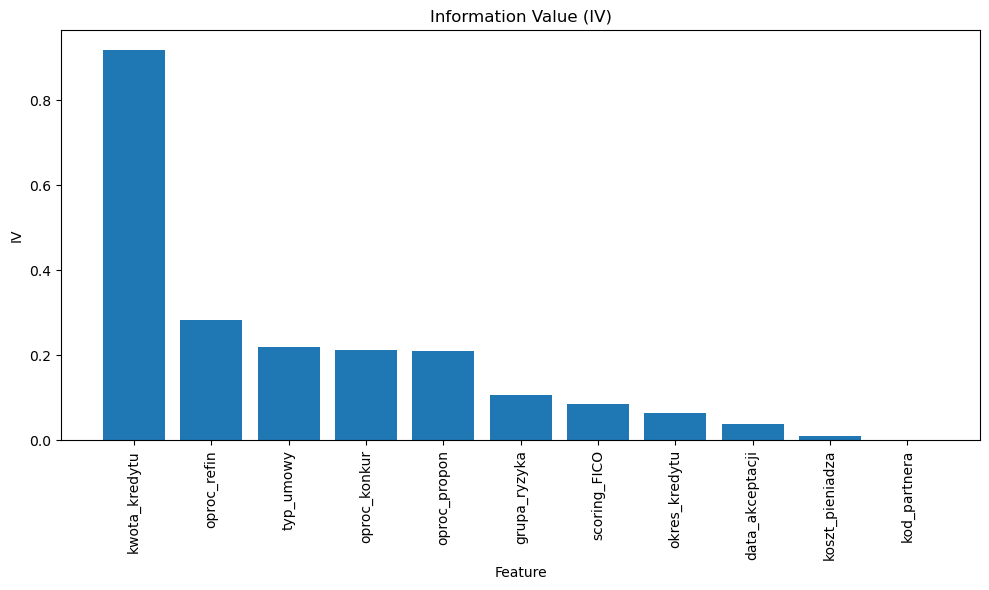

In [18]:
# Wyświetlenie IV na wykresie słupkowym
plt.figure(figsize=(10,6))
plt.bar(iv_df['feature'], iv_df['IV'])
plt.xticks(rotation=90)
plt.title('Information Value (IV)')
plt.xlabel('Feature')
plt.ylabel('IV')
plt.tight_layout()
plt.show()